In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
B = np.zeros((2, 100))

B[0, :] = np.sin(np.linspace(0, 2 * np.pi, 100))
B[1, :] = np.cos(np.linspace(0, 2 * np.pi, 100))
t = np.linspace(0, 2 * np.pi, 100)
dt = t[1] - t[0]

In [114]:
# X is all elements from B  except the last one
X = B[:, :-1]
# Y is all elements from B except the first one
Y = B[:, 1:]

In [131]:
X.shape, Y.shape

((2, 99), (2, 99))

In [115]:
rank = 2

In [116]:
U, s, V = np.linalg.svd(X, full_matrices=False)
V = V.conj().T
U = U[:, :rank]
V = V[:, :rank]
s = s[:rank]

In [117]:
atilde = np.linalg.multi_dot([U.T.conj(), Y, V]) * np.reciprocal(s)
atilde.shape

(2, 2)

In [118]:
Lambda, W = np.linalg.eig(atilde)

In [119]:
Phi = np.linalg.multi_dot([Y, V, np.diag(np.reciprocal(s)), W])
Phi.shape

(2, 2)

In [120]:
b = np.linalg.lstsq(Phi, X.T[0], rcond=None)[0]
b

array([-0.04484748-0.70568315j, -0.04484748+0.70568315j])

In [121]:
omega = np.log(Lambda) / dt
omega

array([7.92653862e-16+1.j, 7.92653862e-16-1.j])

In [123]:
T_omega = np.zeros((rank, t.shape[0]), dtype=np.complex128)
for i in range(rank):
    for j in range(t.shape[0]):
        T_omega[i, j] = np.exp(omega[i] * t[j])

In [124]:
X_dmd = Phi @ np.diag(b) @ T_omega
X_dmd.shape

(2, 100)

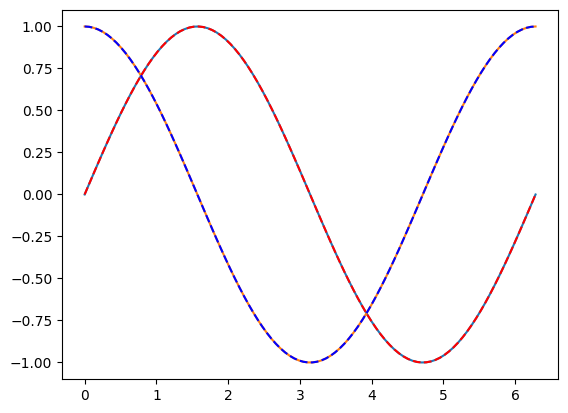

In [136]:
first_dmd = X_dmd[0, :].real
second_dmd = X_dmd[1, :].real
first_true = B[0, :]
second_true = B[1, :]
plt.plot(t, first_dmd, label="DMD")
plt.plot(t, second_dmd, label="DMD")
plt.plot(t, first_true, 'r--', label="True")
plt.plot(t, second_true, 'b--', label="True")